# FLights Data set 

## Preliminary Wrangling

The original dataset reports flights in the United States, including carriers, arrival and departure delays, and reasons for delays, from 1987 to 2008.

I will analyse the data from 2008 data set. The data set can be downloaded from http://stat-computing.org/dataexpo/2009/the-data.html.

In [140]:
# import modules
import pandas as pd
import numpy as np
import os
import requests
import calendar
import datetime as dt

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Gathering

In [141]:
df= pd.read_csv('data/2008.csv', nrows=None, encoding='latin-1')
df.shape

(7009728, 29)

In [142]:
df.sample(20)

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,...,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
529951,2008,1,31,4,1828.0,1835,1919.0,1922,AQ,47,...,3.0,8.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
4999903,2008,9,4,4,2027.0,2029,2146.0,2155,OO,6458,...,5.0,13.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
5545895,2008,10,13,1,1106.0,1112,1154.0,1212,OO,3881,...,4.0,24.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
4081488,2008,7,25,5,1705.0,1711,1800.0,1810,9E,3737,...,8.0,18.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
1024288,2008,2,12,2,1115.0,1115,1225.0,1221,NW,1212,...,5.0,14.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
2205821,2008,4,23,3,1246.0,1250,1438.0,1450,MQ,4880,...,11.0,13.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
3853973,2008,7,20,7,816.0,821,834.0,857,UA,697,...,5.0,11.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
6491669,2008,12,11,4,702.0,705,946.0,1000,WN,1754,...,3.0,7.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
2150844,2008,4,18,5,2250.0,2259,456.0,519,FL,539,...,6.0,8.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
1899527,2008,4,5,6,1356.0,1405,1513.0,1535,XE,2098,...,7.0,10.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN


In [143]:
# check shape
df.shape

(7009728, 29)

In [144]:
# check df
df.sample(10)

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,...,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
267377,2008,1,9,3,NaN,1117,NaN,1159,US,472,...,NaN,NaN,1,A,0,NaN,NaN,NaN,NaN,NaN
4267169,2008,8,13,3,1232.0,1235,1312.0,1320,WN,1624,...,5.0,7.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
801045,2008,2,23,6,1248.0,1131,1407.0,1241,OO,6527,...,18.0,8.0,0,NaN,0,0.0,0.0,0.0,0.0,86.0
2355255,2008,4,10,4,1038.0,1035,1211.0,1200,CO,1171,...,9.0,23.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
904417,2008,2,26,2,1504.0,1505,1654.0,1640,DL,305,...,6.0,28.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
3244877,2008,6,11,3,1623.0,1623,1625.0,1639,UA,1129,...,2.0,13.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
294784,2008,1,31,4,756.0,800,904.0,914,US,2165,...,10.0,13.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
3041170,2008,6,16,1,1859.0,1810,2025.0,1935,WN,2279,...,3.0,13.0,0,NaN,0,0.0,0.0,1.0,0.0,49.0
5965830,2008,11,10,1,1801.0,1805,2100.0,2105,WN,3599,...,6.0,23.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
2691146,2008,5,3,6,1029.0,1035,1147.0,1200,WN,1122,...,4.0,10.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN


## Assessing

In [145]:
# check df
df.head(10).T

,0,1,2,3,4,5,6,7,8,9
Year,2008,2008,2008,2008,2008,2008,2008,2008,2008,2008
Month,1,1,1,1,1,1,1,1,1,1
DayofMonth,3,3,3,3,3,3,3,3,3,3
DayOfWeek,4,4,4,4,4,4,4,4,4,4
DepTime,2003,754,628,926,1829,1940,1937,1039,617,1620
CRSDepTime,1955,735,620,930,1755,1915,1830,1040,615,1620
ArrTime,2211,1002,804,1054,1959,2121,2037,1132,652,1639
CRSArrTime,2225,1000,750,1100,1925,2110,1940,1150,650,1655
UniqueCarrier,WN,WN,WN,WN,WN,WN,WN,WN,WN,WN
FlightNum,335,3231,448,1746,3920,378,509,535,11,810


In [146]:
# check summary statistics
df.describe()

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,FlightNum,ActualElapsedTime,...,Distance,TaxiIn,TaxiOut,Cancelled,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
count,7009728.0,7.009728e+06,7.009728e+06,7.009728e+06,6.873482e+06,7.009728e+06,6.858079e+06,7.009728e+06,7.009728e+06,6.855029e+06,...,7.009728e+06,6.858079e+06,6.872670e+06,7.009728e+06,7.009728e+06,1.524735e+06,1.524735e+06,1.524735e+06,1.524735e+06,1.524735e+06
mean,2008.0,6.375130e+00,1.572801e+01,3.924182e+00,1.333830e+03,1.326086e+03,1.481258e+03,1.494801e+03,2.224200e+03,1.273224e+02,...,7.263870e+02,6.860852e+00,1.645305e+01,1.960618e-02,2.463006e-03,1.577206e+01,3.039031e+00,1.716462e+01,7.497434e-02,2.077098e+01
std,0.0,3.406737e+00,8.797068e+00,1.988259e+00,4.780689e+02,4.642509e+02,5.052251e+02,4.826728e+02,1.961716e+03,7.018731e+01,...,5.621018e+02,4.933649e+00,1.133280e+01,1.386426e-01,4.956753e-02,4.009912e+01,1.950287e+01,3.189495e+01,1.837940e+00,3.925964e+01
min,2008.0,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,1.200000e+01,...,1.100000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2008.0,3.000000e+00,8.000000e+00,2.000000e+00,9.280000e+02,9.250000e+02,1.107000e+03,1.115000e+03,6.220000e+02,7.700000e+01,...,3.250000e+02,4.000000e+00,1.000000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2008.0,6.000000e+00,1.600000e+01,4.000000e+00,1.325000e+03,1.320000e+03,1.512000e+03,1.517000e+03,1.571000e+03,1.100000e+02,...,5.810000e+02,6.000000e+00,1.400000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,6.000000e+00,0.000000e+00,0.000000e+00
75%,2008.0,9.000000e+00,2.300000e+01,6.000000e+00,1.728000e+03,1.715000e+03,1.909000e+03,1.907000e+03,3.518000e+03,1.570000e+02,...,9.540000e+02,8.000000e+00,1.900000e+01,0.000000e+00,0.000000e+00,1.600000e+01,0.000000e+00,2.100000e+01,0.000000e+00,2.600000e+01
max,2008.0,1.200000e+01,3.100000e+01,7.000000e+00,2.400000e+03,2.359000e+03,2.400000e+03,2.400000e+03,9.743000e+03,1.379000e+03,...,4.962000e+03,3.080000e+02,4.290000e+02,1.000000e+00,1.000000e+00,2.436000e+03,1.352000e+03,1.357000e+03,3.920000e+02,1.316000e+03


In [147]:
# check null
df.isna().sum()

Year                       0
Month                      0
DayofMonth                 0
DayOfWeek                  0
DepTime               136246
CRSDepTime                 0
ArrTime               151649
CRSArrTime                 0
UniqueCarrier              0
FlightNum                  0
TailNum                83365
ActualElapsedTime     154699
CRSElapsedTime           844
AirTime               154699
ArrDelay              154699
DepDelay              136246
Origin                     0
Dest                       0
Distance                   0
TaxiIn                151649
TaxiOut               137058
Cancelled                  0
CancellationCode     6872294
Diverted                   0
CarrierDelay         5484993
WeatherDelay         5484993
NASDelay             5484993
SecurityDelay        5484993
LateAircraftDelay    5484993
dtype: int64

In [148]:
# check columns name
df.columns

Index(['Year', 'Month', 'DayofMonth', 'DayOfWeek', 'DepTime', 'CRSDepTime',
       'ArrTime', 'CRSArrTime', 'UniqueCarrier', 'FlightNum', 'TailNum',
       'ActualElapsedTime', 'CRSElapsedTime', 'AirTime', 'ArrDelay',
       'DepDelay', 'Origin', 'Dest', 'Distance', 'TaxiIn', 'TaxiOut',
       'Cancelled', 'CancellationCode', 'Diverted', 'CarrierDelay',
       'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay'],
      dtype='object')

### Variable descriptions

 - **Year**:     2004 - 2008
 - **Month**	           1-12
 - **DayofMonth**	       1-31
 - **DayOfWeek**     	   1 (Monday) - 7 (Sunday)
 - **DepTime**	          actual departure time (local, hhmm)
 - **CRSDepTime** 	       scheduled departure time (local, hhmm) X
 - **ArrTime** 	       actual arrival time (local, hhmm)
 - **CRSArrTime**	       scheduled arrival time (local, hhmm)  X
 - **UniqueCarrier**	   unique carrier code                   X        
 - **FlightNum**	       flight number                         X
 - **TailNum**	           plane tail number                     X
 - **ActualElapsedTime**  in minutes
 - **CRSElapsedTime**	   in minutes
 - **AirTime**	           in minutes
 - **ArrDelay**	       arrival delay, in minutes
 - **DepDelay**	       departure delay, in minutes
 - **Origin**           origin IATA airport code
 - **Dest**	           destination IATA airport code
 - **Distance**	       in miles
 - **TaxiIn**	           taxi in time, in minutes
 - **TaxiOut**	           taxi out time in minutes
 - **Cancelled**	       was the flight cancelled?
 - **CancellationCode**   reason for cancellation (A = carrier, B = weather, C = NAS, D = security)
 - **Diverted**	       1 = yes, 0 = no
 - **CarrierDelay**	   in minutes
 - **WeatherDelay**	   in minutes
 - **NASDelay**	       in minutes
 - **SecurityDelay**	   in minutes
 - **LateAircraftDelay**  in minutes


In [149]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7009728 entries, 0 to 7009727
Data columns (total 29 columns):
Year                 int64
Month                int64
DayofMonth           int64
DayOfWeek            int64
DepTime              float64
CRSDepTime           int64
ArrTime              float64
CRSArrTime           int64
UniqueCarrier        object
FlightNum            int64
TailNum              object
ActualElapsedTime    float64
CRSElapsedTime       float64
AirTime              float64
ArrDelay             float64
DepDelay             float64
Origin               object
Dest                 object
Distance             int64
TaxiIn               float64
TaxiOut              float64
Cancelled            int64
CancellationCode     object
Diverted             int64
CarrierDelay         float64
WeatherDelay         float64
NASDelay             float64
SecurityDelay        float64
LateAircraftDelay    float64
dtypes: float64(14), int64(10), object(5)
memory usage: 1.5+ GB


In [150]:
# check cancelled values und total no. for each
df.groupby("Cancelled").size().sort_values(ascending=False)

Cancelled
0    6872294
1     137434
dtype: int64

In [36]:
# check DepDelay statistics
df.DepDelay.describe()

count    6.873482e+06
mean     9.972570e+00
std      3.531127e+01
min     -5.340000e+02
25%     -4.000000e+00
50%     -1.000000e+00
75%      8.000000e+00
max      2.467000e+03
Name: DepDelay, dtype: float64

In [151]:
df.groupby("CancellationCode").size().sort_values(ascending=False)

CancellationCode
B    54904
A    54330
C    28188
D       12
dtype: int64

In [37]:
# check ArrDelay statistics
df.ArrDelay.describe()     

count    6.855029e+06
mean     8.168452e+00
std      3.850194e+01
min     -5.190000e+02
25%     -1.000000e+01
50%     -2.000000e+00
75%      1.200000e+01
max      2.461000e+03
Name: ArrDelay, dtype: float64

In [38]:
# Out of all delayed flights, percent of cancelled
#if cancel_delay[0] + cancel_delay[1] > 0:
#    cancelled_ratio = cancel_delay[1] / (cancel_delay[0] + cancel_delay[1])
#print(cancelled_ratio)

In [152]:
df.groupby("Diverted").size().sort_values(ascending=False)

Diverted
0    6992463
1      17265
dtype: int64

## What is the structure of your dataset? 

> There are 7009728 observations in total in 2008. A number of columns is 29 for the data set. Before we start analyzing data, data cleaning is essential.
Following points should be checked in the data set.
<p></p>

### Quality issue NEED UPDATE

- missing value for DepTime and ArrTime as well as ArrDelay and DepDelay
- missing CancellationCode
- missing CarrierDelay, WeatherDelay, NASDelay, SecurityDelay and LateAircraftDelay
- Cancelled is int64
- CancellationCode is object
- Year, Month, DayofMonth and DayOfWeek are int
- DepTime, ArrTime are float64
- ArrDelay, DepDelay are float64
- Cancelled is int64
- CarrierDelay, WeatherDelay, NASDelay, SecurityDelay and LateAircraftDelay are float64
  
### Structure issue

- There are un necessary columns


## Cleaning
- Erroneous Datatype
- Manage missing values, Null values
- drop un necessary columns: 'CRSDepTime', 'CRSArrTime','TailNum','FlightNum', 'TaxiIn', 'TaxiOut','ActualElapsedTime','CRSElapsedTime','AirTime'

In [153]:
df['Date'] = pd.to_datetime(df.Year*10000+df.Month*100+df.DayofMonth,format='%Y%m%d')

In [154]:
df.head()

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,...,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,Date
0,2008,1,3,4,2003.0,1955,2211.0,2225,WN,335,...,8.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN,2008-01-03
1,2008,1,3,4,754.0,735,1002.0,1000,WN,3231,...,10.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN,2008-01-03
2,2008,1,3,4,628.0,620,804.0,750,WN,448,...,17.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN,2008-01-03
3,2008,1,3,4,926.0,930,1054.0,1100,WN,1746,...,7.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN,2008-01-03
4,2008,1,3,4,1829.0,1755,1959.0,1925,WN,3920,...,10.0,0,NaN,0,2.0,0.0,0.0,0.0,32.0,2008-01-03


In [155]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7009728 entries, 0 to 7009727
Data columns (total 30 columns):
Year                 int64
Month                int64
DayofMonth           int64
DayOfWeek            int64
DepTime              float64
CRSDepTime           int64
ArrTime              float64
CRSArrTime           int64
UniqueCarrier        object
FlightNum            int64
TailNum              object
ActualElapsedTime    float64
CRSElapsedTime       float64
AirTime              float64
ArrDelay             float64
DepDelay             float64
Origin               object
Dest                 object
Distance             int64
TaxiIn               float64
TaxiOut              float64
Cancelled            int64
CancellationCode     object
Diverted             int64
CarrierDelay         float64
WeatherDelay         float64
NASDelay             float64
SecurityDelay        float64
LateAircraftDelay    float64
Date                 datetime64[ns]
dtypes: datetime64[ns](1), float64(

In [156]:
df.info(null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7009728 entries, 0 to 7009727
Data columns (total 30 columns):
Year                 7009728 non-null int64
Month                7009728 non-null int64
DayofMonth           7009728 non-null int64
DayOfWeek            7009728 non-null int64
DepTime              6873482 non-null float64
CRSDepTime           7009728 non-null int64
ArrTime              6858079 non-null float64
CRSArrTime           7009728 non-null int64
UniqueCarrier        7009728 non-null object
FlightNum            7009728 non-null int64
TailNum              6926363 non-null object
ActualElapsedTime    6855029 non-null float64
CRSElapsedTime       7008884 non-null float64
AirTime              6855029 non-null float64
ArrDelay             6855029 non-null float64
DepDelay             6873482 non-null float64
Origin               7009728 non-null object
Dest                 7009728 non-null object
Distance             7009728 non-null int64
TaxiIn               6858079 non-

### Define
- convert CancellationCode into ordered categorical types

### Code

In [157]:
CancellationCode_dict = {'CancellationCode': ['A','B','C','D']}

for var in CancellationCode_dict:
    CancellationCode_var = pd.api.types.CategoricalDtype(ordered = True,categories = CancellationCode_dict[var])
    df[var] = df[var].astype(CancellationCode_var)

### Test

In [158]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7009728 entries, 0 to 7009727
Data columns (total 30 columns):
Year                 int64
Month                int64
DayofMonth           int64
DayOfWeek            int64
DepTime              float64
CRSDepTime           int64
ArrTime              float64
CRSArrTime           int64
UniqueCarrier        object
FlightNum            int64
TailNum              object
ActualElapsedTime    float64
CRSElapsedTime       float64
AirTime              float64
ArrDelay             float64
DepDelay             float64
Origin               object
Dest                 object
Distance             int64
TaxiIn               float64
TaxiOut              float64
Cancelled            int64
CancellationCode     category
Diverted             int64
CarrierDelay         float64
WeatherDelay         float64
NASDelay             float64
SecurityDelay        float64
LateAircraftDelay    float64
Date                 datetime64[ns]
dtypes: category(1), datetime64[n

### Define
- Create a data set for cancelled flight
- Create a column to describe the CancellationCode
- Change Cancelled column Type from Int to Boolean

In [159]:
# create a copy of the dataset only for cancelled flights
df_cancelled = df.copy()
df_cancelled.drop(['DepTime','CRSDepTime','ArrTime', 'CRSArrTime', 'UniqueCarrier', 'FlightNum', 'TailNum','ActualElapsedTime', 'CRSElapsedTime', 'AirTime', 'ArrDelay','DepDelay', 'Origin', 'Dest', 'Distance', 'TaxiIn', 'TaxiOut','Diverted', 'CarrierDelay','WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay'], axis=1, inplace=True)

In [163]:
# Create a column to describe the CancellationCode
df_cancelled['Cancellation_Desc'] = df_cancelled.CancellationCode.map({'A':'Carrier', 'B':'Weather', 'C':'NAS', 'D':'Security'})

In [185]:
df_cancelled['Cancelled'] = df_cancelled['Cancelled'].astype('bool')

### Test

In [164]:
# View the dataset
#df_cancelled.query("Cancelled == 1 ")

In [160]:
df_cancelled.head()

,Year,Month,DayofMonth,DayOfWeek,Cancelled,CancellationCode,Date
0,2008,1,3,4,0,NaN,2008-01-03
1,2008,1,3,4,0,NaN,2008-01-03
2,2008,1,3,4,0,NaN,2008-01-03
3,2008,1,3,4,0,NaN,2008-01-03
4,2008,1,3,4,0,NaN,2008-01-03


In [161]:
df_cancelled.shape

(7009728, 7)

In [186]:
df_cancelled.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7009728 entries, 0 to 7009727
Data columns (total 8 columns):
Year                 int64
Month                int64
DayofMonth           int64
DayOfWeek            int64
Cancelled            bool
CancellationCode     category
Date                 datetime64[ns]
Cancellation_Desc    object
dtypes: bool(1), category(1), datetime64[ns](1), int64(4), object(1)
memory usage: 334.3+ MB


### Define
Change Diverted column Type from Int to Boolean

### Code

In [200]:
df['Diverted'] = df['Diverted'].astype('bool')

### Test

In [201]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6855029 entries, 0 to 7009727
Data columns (total 20 columns):
Year                 int64
Month                int64
DayofMonth           int64
DayOfWeek            int64
DepTime              float64
ArrTime              float64
UniqueCarrier        object
AirTime              float64
ArrDelay             float64
DepDelay             float64
Origin               object
Dest                 object
Distance             int64
Diverted             bool
CarrierDelay         float64
WeatherDelay         float64
NASDelay             float64
SecurityDelay        float64
LateAircraftDelay    float64
Date                 datetime64[ns]
dtypes: bool(1), datetime64[ns](1), float64(10), int64(5), object(3)
memory usage: 1.0+ GB


### Define
Manage missing values, Null values from the original dataset

### Code

In [165]:
df.dropna(subset=['DepTime'], inplace=True) 

In [166]:
df.shape

(6873482, 30)

In [167]:
df.isna().sum()

Year                       0
Month                      0
DayofMonth                 0
DayOfWeek                  0
DepTime                    0
CRSDepTime                 0
ArrTime                15403
CRSArrTime                 0
UniqueCarrier              0
FlightNum                  0
TailNum                   10
ActualElapsedTime      18453
CRSElapsedTime           598
AirTime                18453
ArrDelay               18453
DepDelay                   0
Origin                     0
Dest                       0
Distance                   0
TaxiIn                 15403
TaxiOut                  812
Cancelled                  0
CancellationCode     6872294
Diverted                   0
CarrierDelay         5348747
WeatherDelay         5348747
NASDelay             5348747
SecurityDelay        5348747
LateAircraftDelay    5348747
Date                       0
dtype: int64

In [168]:
df.dropna(subset=['ArrTime'], inplace=True) 

In [169]:
df.isna().sum()

Year                       0
Month                      0
DayofMonth                 0
DayOfWeek                  0
DepTime                    0
CRSDepTime                 0
ArrTime                    0
CRSArrTime                 0
UniqueCarrier              0
FlightNum                  0
TailNum                    5
ActualElapsedTime       3050
CRSElapsedTime             0
AirTime                 3050
ArrDelay                3050
DepDelay                   0
Origin                     0
Dest                       0
Distance                   0
TaxiIn                     0
TaxiOut                    0
Cancelled                  0
CancellationCode     6858079
Diverted                   0
CarrierDelay         5333344
WeatherDelay         5333344
NASDelay             5333344
SecurityDelay        5333344
LateAircraftDelay    5333344
Date                       0
dtype: int64

In [170]:
df.dropna(subset=['ArrDelay'], inplace=True) 

In [171]:
df.isna().sum()

Year                       0
Month                      0
DayofMonth                 0
DayOfWeek                  0
DepTime                    0
CRSDepTime                 0
ArrTime                    0
CRSArrTime                 0
UniqueCarrier              0
FlightNum                  0
TailNum                    5
ActualElapsedTime          0
CRSElapsedTime             0
AirTime                    0
ArrDelay                   0
DepDelay                   0
Origin                     0
Dest                       0
Distance                   0
TaxiIn                     0
TaxiOut                    0
Cancelled                  0
CancellationCode     6855029
Diverted                   0
CarrierDelay         5330294
WeatherDelay         5330294
NASDelay             5330294
SecurityDelay        5330294
LateAircraftDelay    5330294
Date                       0
dtype: int64

### Test

In [172]:
df.isna().sum()

Year                       0
Month                      0
DayofMonth                 0
DayOfWeek                  0
DepTime                    0
CRSDepTime                 0
ArrTime                    0
CRSArrTime                 0
UniqueCarrier              0
FlightNum                  0
TailNum                    5
ActualElapsedTime          0
CRSElapsedTime             0
AirTime                    0
ArrDelay                   0
DepDelay                   0
Origin                     0
Dest                       0
Distance                   0
TaxiIn                     0
TaxiOut                    0
Cancelled                  0
CancellationCode     6855029
Diverted                   0
CarrierDelay         5330294
WeatherDelay         5330294
NASDelay             5330294
SecurityDelay        5330294
LateAircraftDelay    5330294
Date                       0
dtype: int64

In [173]:
df.shape

(6855029, 30)

### Define
- Drop un necessary columns: 'CRSDepTime', 'CRSArrTime','TailNum','FlightNum', 'TaxiIn', 'TaxiOut','ActualElapsedTime','CRSElapsedTime','AirTime'

### Code

In [174]:
# drop un necessary columns
df.drop(['CRSDepTime', 'CRSArrTime','TailNum', 'FlightNum', 'TaxiIn','TaxiOut', 'ActualElapsedTime','CRSElapsedTime','Cancelled', 'CancellationCode', ], axis=1, inplace=True)

### Test

In [175]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6855029 entries, 0 to 7009727
Data columns (total 20 columns):
Year                 int64
Month                int64
DayofMonth           int64
DayOfWeek            int64
DepTime              float64
ArrTime              float64
UniqueCarrier        object
AirTime              float64
ArrDelay             float64
DepDelay             float64
Origin               object
Dest                 object
Distance             int64
Diverted             int64
CarrierDelay         float64
WeatherDelay         float64
NASDelay             float64
SecurityDelay        float64
LateAircraftDelay    float64
Date                 datetime64[ns]
dtypes: datetime64[ns](1), float64(10), int64(6), object(3)
memory usage: 1.1+ GB


In [176]:
df.sample()

,Year,Month,DayofMonth,DayOfWeek,DepTime,ArrTime,UniqueCarrier,AirTime,ArrDelay,DepDelay,Origin,Dest,Distance,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,Date
4766296,2008,8,1,5,1055.0,1337.0,AS,202.0,5.0,-5.0,SEA,ANC,1449,0,NaN,NaN,NaN,NaN,NaN,2008-08-01


In [211]:
df_clean= df.copy()

## Analysing

- Cancelled Flights
- Cancelled Flights VS all Flights

- Delayed Flights VS all Flights 


- Quantify the reasons behind flight delay by plotting the delay count. It is evident that Arrival and Departure delay is the biggest reasons behind the delay.
- Cancellation resons
- Delay reason per month, Day
- Plot count of all flights and delayed flights by week

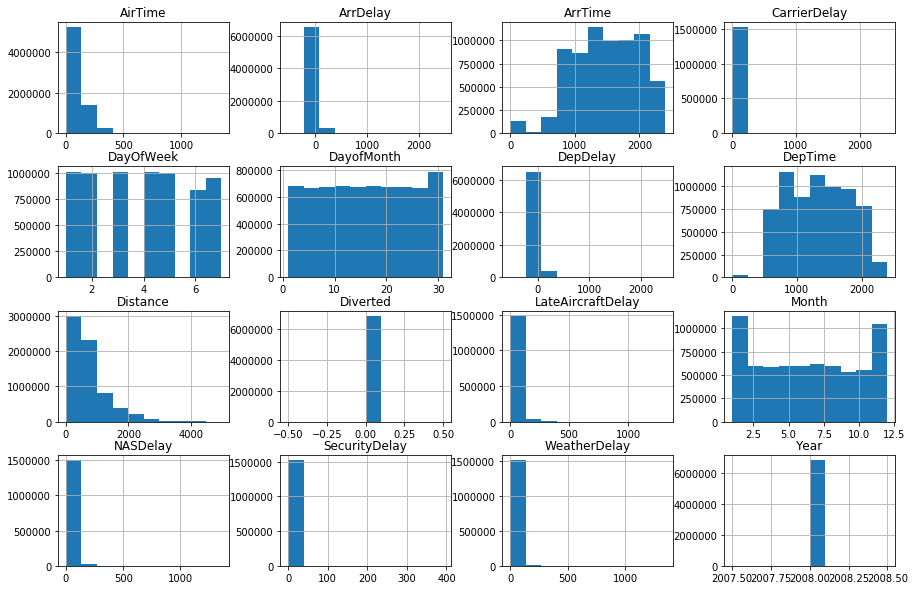

In [178]:
# check qucik histogram
df_clean.hist(figsize=[15, 10]);

### Analyse Cancelled Flights

In [205]:
can_order = df_cancelled['Cancellation_Desc'].value_counts()
can_order

Weather     54904
Carrier     54330
NAS         28188
Security       12
Name: Cancellation_Desc, dtype: int64

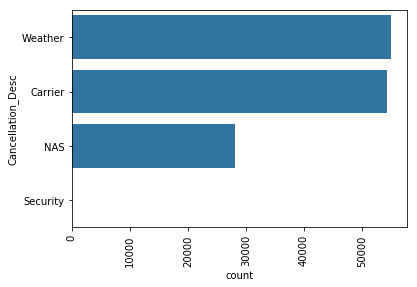

In [207]:
base_color = sns.color_palette()[0]
can_order = df_cancelled['Cancellation_Desc'].value_counts().index
sns.countplot(data = df_cancelled, y = 'Cancellation_Desc', color = base_color, order = typ_order)
plt.xticks(rotation = 90);

### Cancelled Flights VS all Flights

In [188]:
can_flights = df_cancelled['Cancelled'].value_counts()
can_flights

False    6872294
True      137434
Name: Cancelled, dtype: int64

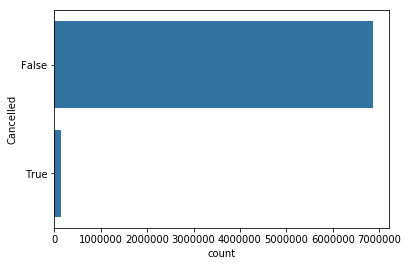

In [208]:
#typ_order = df_cancelled['Cancelled'].value_counts().index
sns.countplot(data = df_cancelled, y = 'Cancelled', color = base_color);
#plt.xticks(rotation = 90);# ?????

### Diverted Flights

In [212]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6855029 entries, 0 to 7009727
Data columns (total 20 columns):
Year                 int64
Month                int64
DayofMonth           int64
DayOfWeek            int64
DepTime              float64
ArrTime              float64
UniqueCarrier        object
AirTime              float64
ArrDelay             float64
DepDelay             float64
Origin               object
Dest                 object
Distance             int64
Diverted             bool
CarrierDelay         float64
WeatherDelay         float64
NASDelay             float64
SecurityDelay        float64
LateAircraftDelay    float64
Date                 datetime64[ns]
dtypes: bool(1), datetime64[ns](1), float64(10), int64(5), object(3)
memory usage: 1.0+ GB


In [216]:
div_flights = df_clean['Diverted'].value_counts()
div_flights

False    6855029
Name: Diverted, dtype: int64

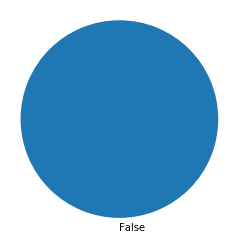

In [220]:
plt.pie(div_flights, labels = div_flights.index, startangle = 90, counterclock = False)
plt.axis('square');
# Something wronge
#Diverted figures from dataset
#0    6992463
#1      17265


###  Delayed Flights VS all Flights 

In [198]:
df_clean['Delayed'] = df_clean['DepDelay']>=10
df_clean.head(2)

,Year,Month,DayofMonth,DayOfWeek,DepTime,ArrTime,UniqueCarrier,ArrDelay,DepDelay,Origin,Dest,Distance,Cancelled,CancellationCode,Date,Delayed
0,2007,1,1,1,1232.0,1341.0,WN,1.0,7.0,SMF,ONT,389,0,NaN,2007-01-01,False
1,2007,1,1,1,1918.0,2043.0,WN,8.0,13.0,SMF,PDX,479,0,NaN,2007-01-01,True


In [199]:
df_flights_by_date = pd.DataFrame(df_clean.groupby('Date')['Year'].count())
df_flights_by_date.head(2)

,Year
Date,
2007-01-01,19157
2007-01-02,20970


In [200]:
df_delayed_flights_by_date = pd.DataFrame(df_clean[df_clean['Delayed']==True].groupby('Date')['Year'].count())
df_delayed_flights_by_date.head()

,Year
Date,
2007-01-01,7548
2007-01-02,6967
2007-01-03,5735
2007-01-04,6128
2007-01-05,7660


In [203]:
df_flights_by_date['Date1']=df_flights_by_date.index
df_delayed_flights_by_date['Date1']=df_delayed_flights_by_date.index

In [210]:
df_flights_by_date_both=df_flights_by_date.merge(df_delayed_flights_by_date, how='inner', on='Date1')
df_flights_by_date_both.head(2)

,Year_x,Date_x,Date1,Year_y,Date_y
0,19157,2007-01-01,2007-01-01,7548,2007-01-01
1,20970,2007-01-02,2007-01-02,6967,2007-01-02


In [211]:
df_flights_by_date_both=df_flights_by_date_both.rename(columns={'Year_x':'All_Flights', 'Year_y':'Delayed_Flights'})

In [212]:
df_flights_by_date_both.head(2)

,All_Flights,Date_x,Date1,Delayed_Flights,Date_y
0,19157,2007-01-01,2007-01-01,7548,2007-01-01
1,20970,2007-01-02,2007-01-02,6967,2007-01-02


In [215]:
df_flights_by_date_both['Week_Num']=df_flights_by_date_both['Date1'].apply(lambda x: x.isocalendar()[1])

In [217]:
df_flights_by_week = df_flights_by_date_both[['Week_Num', 'All_Flights', 'Delayed_Flights']]
df_flights_by_week.head()

,Week_Num,All_Flights,Delayed_Flights
0,1,19157,7548
1,1,20970,6967
2,1,20865,5735
3,1,20393,6128
4,1,20273,7660


In [219]:
df_flights_by_week2=df_flights_by_week.groupby(['Week_Num']).sum()
df_flights_by_week2.head()

,All_Flights,Delayed_Flights
Week_Num,,
1,323704,106296
2,267365,56639
3,264222,70437
4,268842,64714
5,265058,68952


In [220]:
df_flights_by_week2['Week_Num']= df_flights_by_week2.index

Text(0, 0.5, 'Number of Flights')

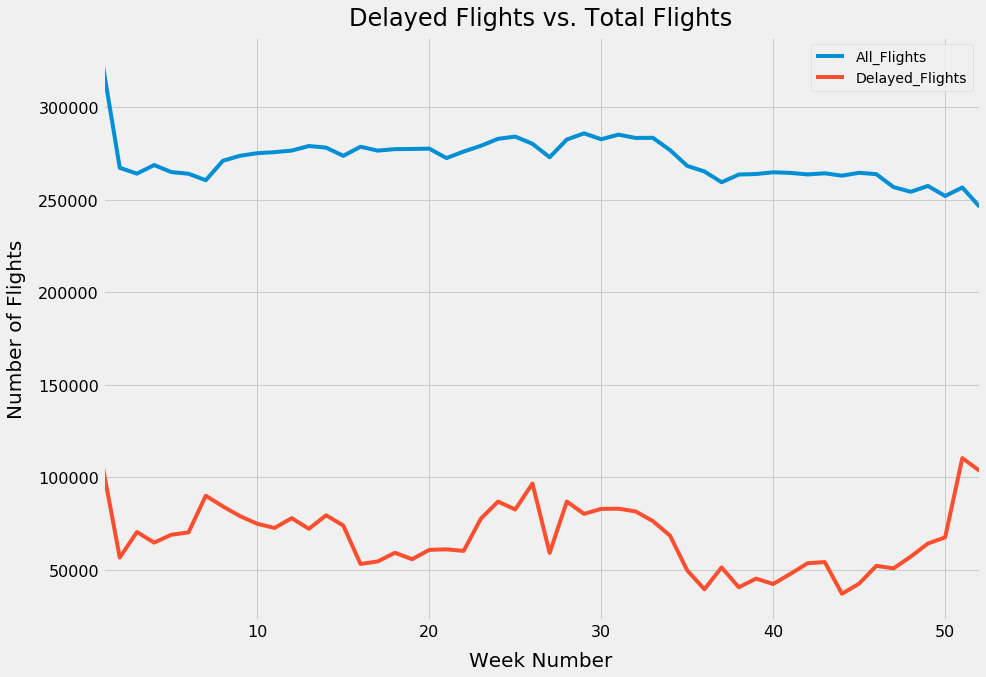

In [222]:
#plt.style.use('fivethirtyeight')
df_flights_by_week2.set_index(['Week_Num']).plot(kind='line', figsize=(14, 10), grid=True, fontsize=16)
plt.title("Delayed Flights vs. Total Flights", fontsize=24, y=1.01)
plt.xlabel("Week Number", fontsize=20, labelpad=12)
plt.ylabel("Number of Flights", fontsize=20, labelpad=12)

Analyse????

### Analyse the Distance

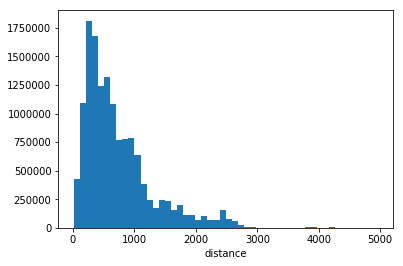

In [67]:
plt.hist(data = df_clean, x = "Distance", bins = 50)
plt.xlabel("distance");

In [68]:
# The extremely high values  should be paid more attention. These can be outliers.
df_clean[df_clean.Distance > 3500].sample(5)

,Year,Month,DayofMonth,DayOfWeek,DepTime,ArrTime,UniqueCarrier,AirTime,ArrDelay,DepDelay,Origin,Dest,Distance,Cancelled,CancellationCode,Date
3303370,2007,6,21,4,1020.0,1431.0,UA,521.0,26.0,10.0,ORD,HNL,4243,0,NaN,2007-06-21
8506950,2008,2,29,5,1806.0,522.0,AA,412.0,17.0,-4.0,OGG,DFW,3711,0,NaN,2008-02-29
1066446,2007,2,25,7,1815.0,625.0,AA,468.0,30.0,25.0,HNL,ORD,4243,0,NaN,2007-02-25
12292280,2008,8,12,2,1613.0,649.0,DL,489.0,-24.0,-7.0,HNL,ATL,4502,0,NaN,2008-08-12
6805123,2007,11,14,3,2034.0,825.0,CO,445.0,20.0,-1.0,HNL,IAH,3904,0,NaN,2007-11-14


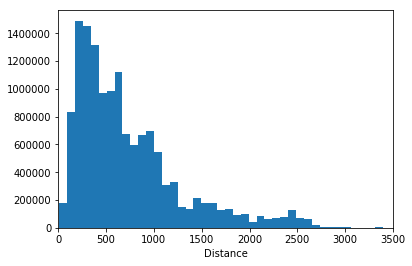

In [69]:
# take a closer look at the data in the x-range bwtween 0 and 3500.
# set x-limit betweeen 0 and 3500
plt.hist(data=df_clean, x="Distance", bins=60)
plt.xlabel("Distance")
plt.xlim([0,3500]);

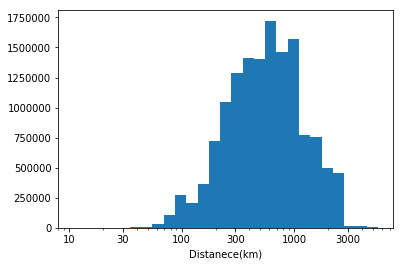

In [70]:
#There is a long tail in the distribution, so put it on a log scale instead.

bin = 10 ** np.arange(np.log10(df.Distance.min()), np.log10(df.Distance.max())+0.1, 0.1)
plt.hist(data=df_clean, x="Distance", bins=bin)
plt.xscale("log")
plt.xlabel("Distanece(km)")
plt.xticks([10,30,100,300,1000,3000],[10,30,100,300,1000,3000]);

Distance has a long-tailed distribution, with a lot of flights on the short distance end, and a few on the long distance end. When plotted on a log-scale, the distance distribution looks roughly normal distribution with a distance ceilings at the right foot. This is simply because the longer the distance between airports is, the more limited flights there are. And some highest values are, as I saw, the flight from or to Hawaii.

### Distance vs. AirTime


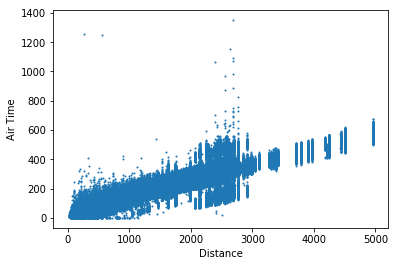

In [73]:
plt.scatter(data=df_clean, x="Distance", y="AirTime",s=1)
plt.xlabel("Distance")
plt.ylabel("Air Time");